## Dataset Overview 

The analysis is based on the **IEA Global EV Data 2024** dataset, sourced from **Kaggle**. The dataset includes several key variables:

* **Region** – Geographic areas such as India, China, etc.
* **Category** – Indicates data type, including *Historical*, *Projection-STEPS*, and *Projection-APS*.
* **Parameter** – Represents specific metrics like *EV stock share*, *EV sales*, *EV charging points*, and more.
* **Mode** – Type of transport, such as *cars* or *vehicles*.
* **Powertrain** – Vehicle types based on power source, including *EV*, *BEV*, *PHEV*, etc.
* **Year** – The corresponding period for the data.
* **Value** – A numerical measure such as the number of vehicles or charging stations.






# Objective of the Analysis:

The main objectives of this analysis are to:

* Monitor global trends in electric vehicle (EV) adoption over time and across different regions.
* Evaluate the growth of EVs about the development of supporting infrastructure, such as charging stations.
* Identify regions where infrastructure development lags behind the pace of EV adoption.
* Analyse the share of EVs in total vehicle sales across various years and regions.




In [38]:
# import all required libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random 
from warnings import filterwarnings
filterwarnings ('ignore')
plt.rcParams['figure.figsize']=(10,8) 


In [2]:
# import data from CSV or Excel

df=pd.read_csv('IEA_Global_EV_Data_2024.csv')
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,3.900000e-04
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,5.500000e+01
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,3.100000e+01
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9.400000e+06
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,1.500000e+07


In [4]:
# Check top 5 data
df.head(5)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [6]:
# Check the shape of the data 
df.shape


(12654, 8)


Rows = 12654, Colomns = 8

In [9]:
# Check the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [11]:
#above data types are correct

In [13]:
# Check if there are null values
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

 ### There are no null values

In [16]:
df['unit'].value_counts()

unit
Vehicles                         6842
percent                          3171
charging points                   918
Milion barrels per day            586
Oil displacement, million lge     586
GWh                               551
Name: count, dtype: int64

In [17]:
df['powertrain'].unique()

array(['EV', 'BEV', 'PHEV', 'Publicly available fast',
       'Publicly available slow', 'FCEV'], dtype=object)

In [18]:
df.head(10)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000
6,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
7,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00240
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.00000
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.00000


In [20]:
# also check if there is duplicate values or not

df.duplicated().sum()

0

# EDA -----> Exploratory Data analysis


### Global adoption trends

<function matplotlib.pyplot.show(close=None, block=None)>

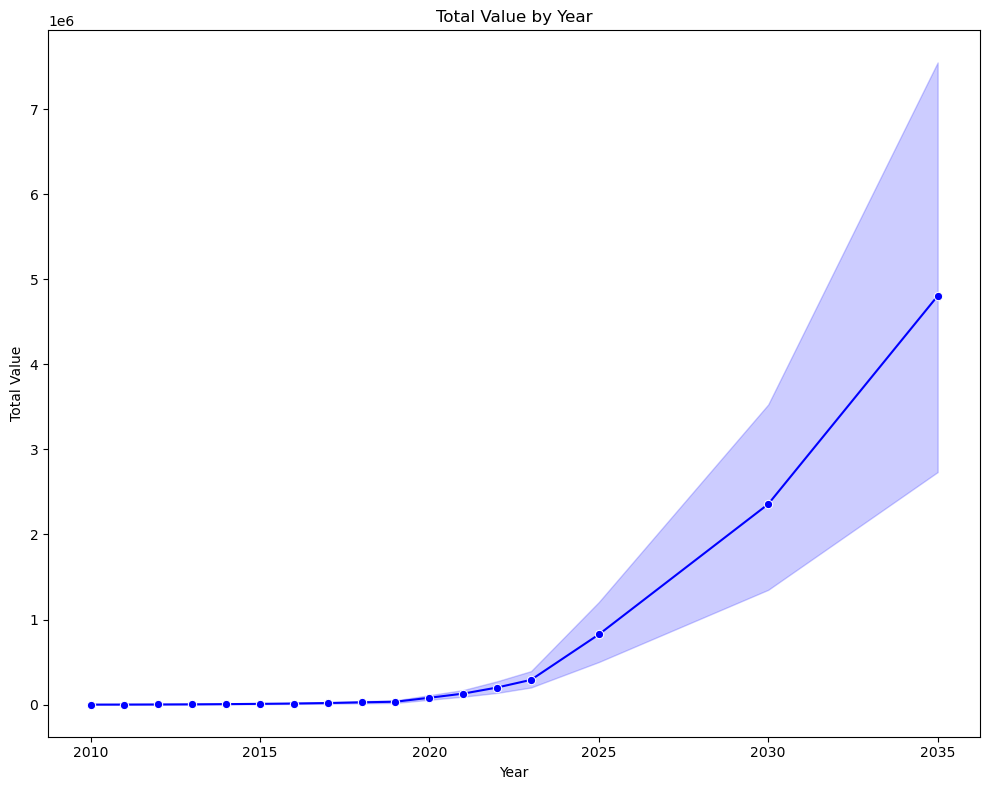

In [41]:
year_df=df.reset_index()

sns.lineplot(data=df, x='year', y='value', marker='o', color='blue')
plt.title('Total Value by Year')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.tight_layout()
plt.show

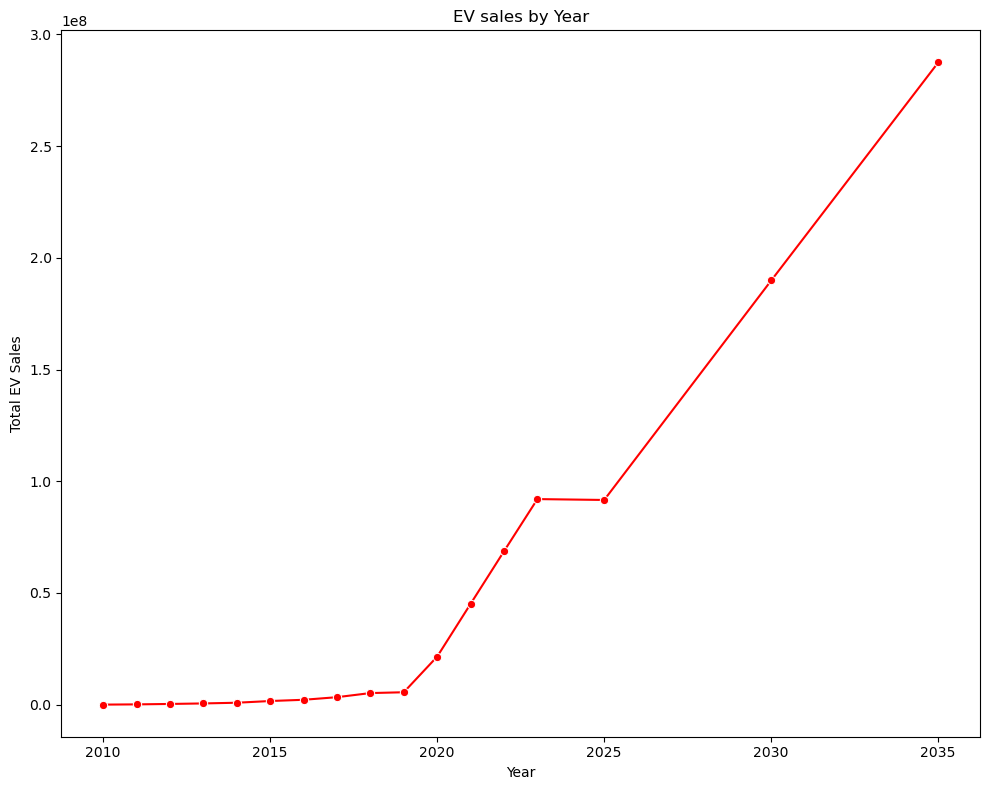

In [40]:
filtered_df = df[df['parameter'] == 'EV sales']
yearly_df = filtered_df.groupby('year')['value'].sum().reset_index()

sns.lineplot(data=yearly_df, x='year', y='value', marker='o', color='red')
plt.title("EV sales by Year")
plt.xlabel("Year")
plt.ylabel('Total EV Sales')
plt.tight_layout()
plt.show()


## Insights

The **"Total Value by Year"** graph highlights the significant growth in electric vehicle (EV) trends over the past decade.
It reflects the increasing market presence of EVs, particularly from **2015 to 2025**, indicating a strong upward trajectory in adoption.

The **"EV Sales by Year"** graph further supports this trend, showing a consistent rise in EV sales year over year. 
Notably, there is a sharp surge — nearly a **10-fold increase** — in EV sales between **2020 and 2025**, illustrating the rapid acceleration in market demand and consumer adoption during this period.



In [36]:
df['parameter'].unique()

array(['EV stock share', 'EV sales share', 'EV sales', 'EV stock',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

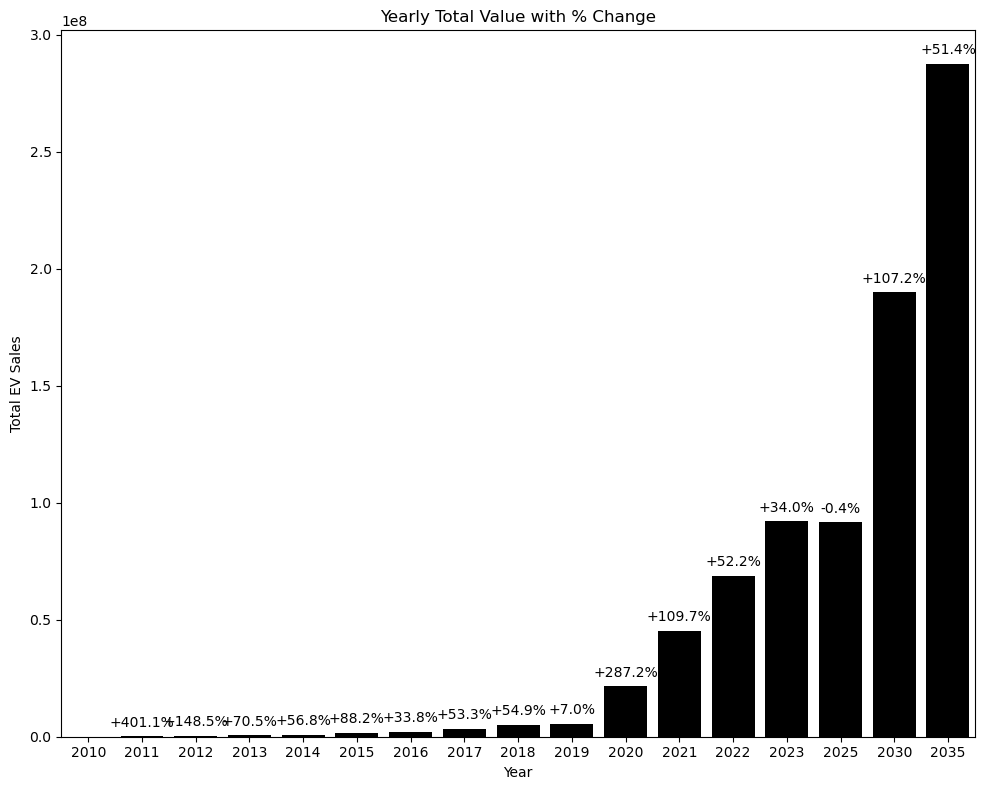

In [39]:
filtered_df = df[df['parameter'] == 'EV sales']
yearly_df = filtered_df.groupby('year')['value'].sum().reset_index()
yearly_df['pct_change'] = yearly_df['value'].pct_change() * 100 

ax=sns.barplot(data=yearly_df, x='year', y='value',color='black')
for i, row in yearly_df.iterrows():
    pct=row['pct_change']
    y_val=row['value']
    if pd.notnull(pct):
        ax.text(i, y_val + max(yearly_df['value']) * 0.01, 
                f'{pct:+.1f}%',
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Yearly Total Value with % Change')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.tight_layout()
plt.show()

### Insights


* EV adoption surged after 2020, with a massive +287.2% growth, marking a major shift.
* Growth remained strong post-2020, especially in 2021 (+109.7%) and 2030 (+107.2%).
* 2010–2019 showed steady but modest growth, reflecting the early adoption phase.
* A sharp dip in 2023 (+0.4%) may signal a temporary slowdown or market saturation.
* Growth rebounds after 2025, indicating a strong long-term outlook for EVs.

The above graph confirms a structural shift rather than a short-term trend, suggesting market maturity and investor readiness.


In [47]:
ev_sales = df[df['parameter'] == 'EV sales']
sales_by_year = ev_sales.groupby('year')['value'].sum().sort_index()
yoy_growth = sales_by_year.pct_change() * 100
avg_yoy_growth = yoy_growth[1:].mean()
avg_yoy_growth
print('The average YoY growth of EV Sales from 2015 to 23','-',avg_yoy_growth)

The average YoY growth of EV Sales from 2015 to 23 - 97.21963274842032


In [49]:
ev_sales = df[df['parameter'] == 'EV sales']
region_year_sales = ev_sales.groupby(['region', 'year'])['value'].sum().unstack()
region_yoy_growth = region_year_sales.pct_change(axis=1) * 100
avg_region_yoy_growth = region_yoy_growth.loc[:, 2016:2023].mean(axis=1).dropna()
print("Average YoY Growth of EV Sales by Region (2015–2023):")
print(avg_region_yoy_growth.sort_values(ascending=False).round(2))

Average YoY Growth of EV Sales by Region (2015–2023):
region
Rest of the world       630.45
Israel                  346.26
United Arab Emirates    304.27
Cyprus                  210.40
India                   190.69
Costa Rica              187.53
Turkiye                 187.21
Brazil                  156.41
Bulgaria                145.95
Mexico                  135.45
Romania                 133.18
Slovenia                132.21
Greece                  122.83
Colombia                109.08
Slovakia                107.80
Europe                  105.61
Chile                    96.76
Croatia                  92.36
Poland                   92.29
Latvia                   90.48
Korea                    89.58
Seychelles               88.51
Lithuania                88.17
Estonia                  88.06
New Zealand              87.09
Hungary                  86.89
China                    85.62
World                    85.38
Australia                83.91
Czech Republic           83.41
Luxembour

### Regional Comparison

In [50]:
ev_sales = df[df['parameter'] == 'EV sales']
region_year_sales = ev_sales.groupby(['region', 'year'])['value'].sum().unstack()
region_year_sales = region_year_sales.sort_index(axis=1)
cagr_region = ((region_year_sales[2023] / region_year_sales[2015]) ** (1 / 8) - 1) * 100
cagr_region = cagr_region.dropna()
print("CAGR of EV Sales by Region (2015–2023):")
print(cagr_region.sort_values(ascending=False).round(2))

CAGR of EV Sales by Region (2015–2023):
region
Costa Rica           143.23
Israel               136.05
Romania              123.61
Brazil               121.70
Rest of the world    116.19
India                115.39
Turkiye              103.89
Greece               103.86
Mexico                87.62
Colombia              86.32
Poland                85.45
Bulgaria              78.46
Slovakia              78.25
China                 74.11
Hungary               73.92
Latvia                72.73
New Zealand           72.18
Finland               71.68
World                 68.84
Portugal              66.78
Estonia               66.00
Lithuania             65.67
Ireland               65.37
Australia             65.28
Italy                 64.78
Korea                 64.26
Europe                63.96
Spain                 63.36
Belgium               62.89
Czech Republic        58.58
USA                   56.75
Seychelles            55.01
Germany               53.16
Chile                 51.59
C

##### Above are the total CAGR of different types of regions. If we see that the World CAGR is 68.84%.

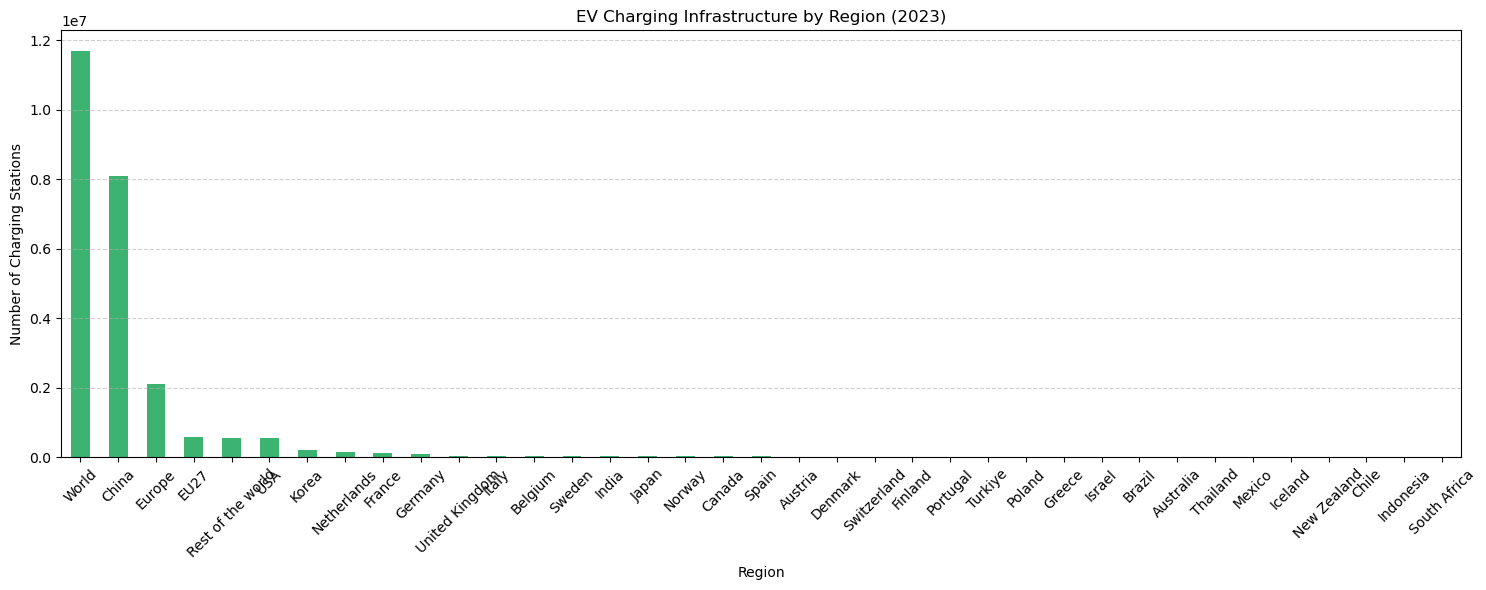

In [51]:
infra_df = df[df['unit'].str.contains('charging points', case=False)]
infra_2023 = infra_df[infra_df['year'] == 2023]
region_infra = infra_2023.groupby('region')['value'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
region_infra.plot(kind='bar', color='mediumseagreen')
plt.title('EV Charging Infrastructure by Region (2023)')
plt.xlabel('Region')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### In the above Graph
China has the most advanced infrastructure in the world, which has led to a higher adoption rate of electric vehicles (EVs) compared to other countries.

## Mode & Powertrain Distribution

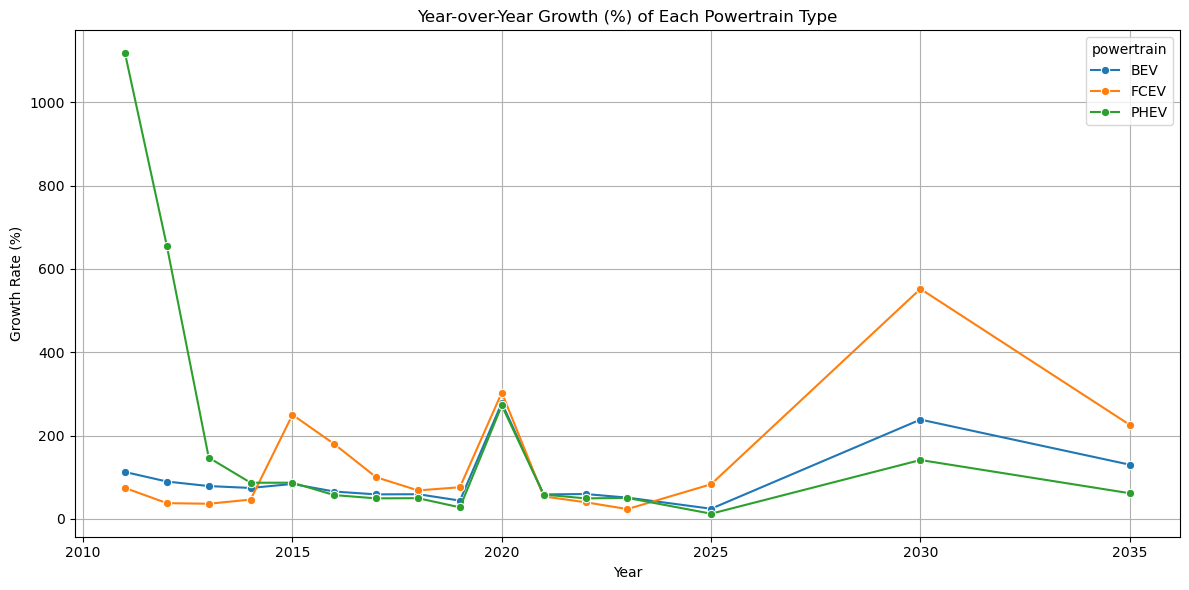

In [52]:
df_powertrain = df[df['parameter'].str.lower().isin(['ev stock', 'new ev registrations'])]
powertrain_yearly = df_powertrain.groupby(['year', 'powertrain'])['value'].sum().reset_index()
powertrain_yearly['growth'] = powertrain_yearly.groupby('powertrain')['value'].pct_change() * 100

powertrain_yearly['growth'] = powertrain_yearly['growth'].replace([float('inf'), -float('inf')], pd.NA) ##Replace infinite or NaN values
fastest_growth = powertrain_yearly.sort_values(['year', 'growth'], ascending=[True, False])

plt.figure(figsize=(12, 6))
sns.lineplot(data=powertrain_yearly, x='year', y='growth', hue='powertrain', marker='o')
plt.title('Year-over-Year Growth (%) of Each Powertrain Type')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
# Avg. growth rate over years
avg_growth = powertrain_yearly.groupby('powertrain')['growth'].mean().sort_values(ascending=False)
print("Average YoY Growth by Powertrain:\n", avg_growth)

Average YoY Growth by Powertrain:
 powertrain
PHEV    182.526928
FCEV    134.230004
BEV      94.039545
Name: growth, dtype: float64


### Insights
PHEVs saw an early surge in adoption, but growth has since levelled off. 
FCEVs experience fluctuating but strong growth, indicating innovation cycles. 
BEVs show steady, policy-driven growth and now dominate the market. 
Strategy: Focus on BEVs for stable returns, watch FCEVs for innovation, and treat PHEVs as a transitional option.

# EV Infrastruture

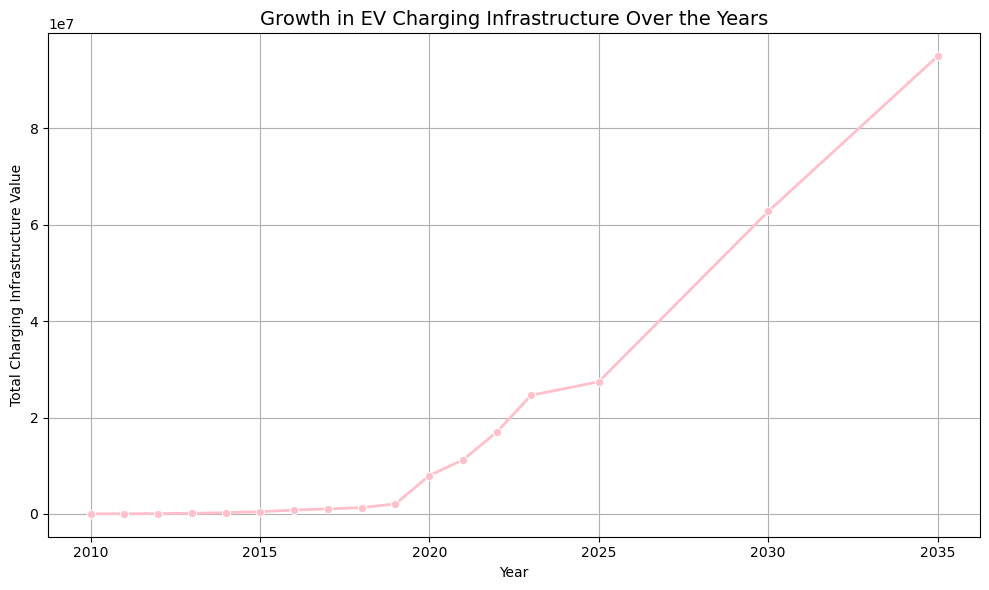

In [54]:
infra_df = df[df['unit'] == 'charging points']
yearly_infra = infra_df.groupby('year')['value'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_infra, x='year', y='value', marker='o', linewidth=2, color='pink')
plt.title("Growth in EV Charging Infrastructure Over the Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Charging Infrastructure Value")
plt.grid(True)
plt.tight_layout()
plt.show()


EV charging infrastructure has increased over the period (2015-25). More and more investment is taking place in the EV sector


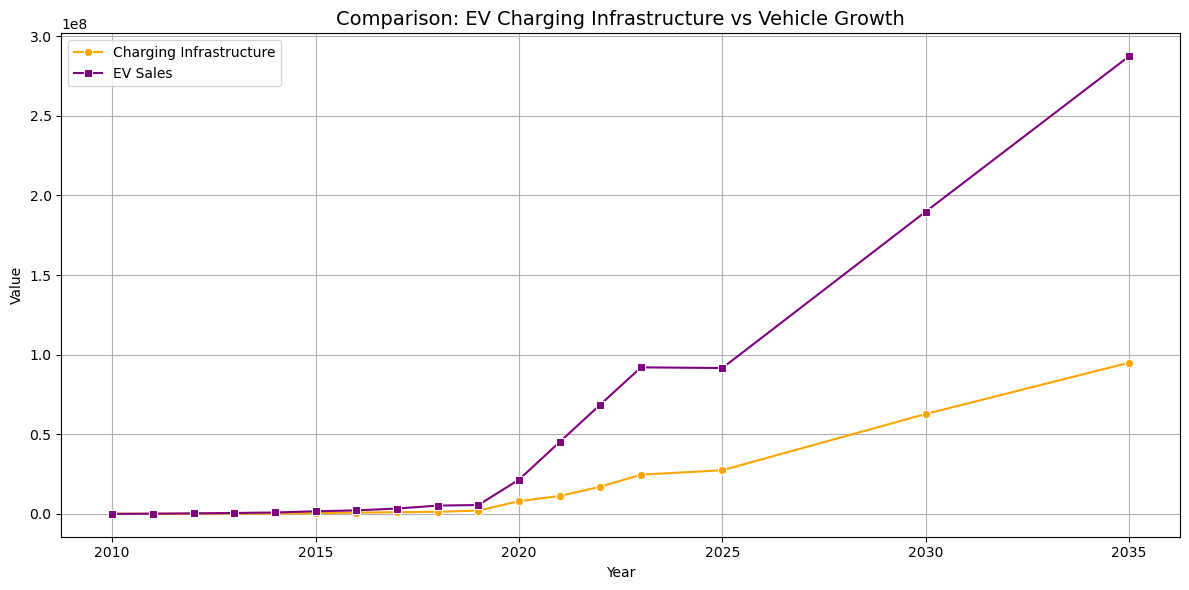

In [57]:
infra_df = df[df['unit'].str.lower().str.contains('charging points')]
infra_yearly = infra_df.groupby('year')['value'].sum().reset_index()
infra_yearly.rename(columns={'value': 'charging_infra'}, inplace=True)
vehicle_df = df[df['parameter'].str.lower().str.contains('ev sales')]
vehicle_yearly = vehicle_df.groupby('year')['value'].sum().reset_index()
vehicle_yearly.rename(columns={'value': 'vehicle_stock'}, inplace=True)
merged_df = pd.merge(infra_yearly, vehicle_yearly, on='year', how='inner')
plt.figure(figsize=(12,6))
sns.lineplot(data=merged_df, x='year', y='charging_infra', marker='o', label='Charging Infrastructure', color='orange')
sns.lineplot(data=merged_df, x='year', y='vehicle_stock', marker='s', label='EV Sales', color='purple')
plt.title("Comparison: EV Charging Infrastructure vs Vehicle Growth", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 In the above graph growth of Electric vehicles is outpacing the infrastructure of EVs, especially post-2020. While both trends are showing an increasing rate and have an upward slope but the EV adoption has faster growth than the  EV infrastructure.
